# **Bengaluru Food Delivery Data Analysis**

## 📌 Objective  
Analyze customer behavior, delivery performance, and business optimization strategies for food delivery in Bengaluru.

## 🔍 Key Insights  
- **Customer Trends**: Identified repeat customers, high LTV users, and peak order times.  
- **Cuisine & Order Patterns**: Determined top cuisines and optimized restaurant onboarding.  
- **Payment Preferences**: Found UPI as the dominant method, guiding promo strategies.  
- **Delivery Performance**: Analyzed delays, cancellations, and peak-hour bottlenecks.  
- **Customer Satisfaction**: Linked ratings and tipping behavior to delivery metrics.  

## 📈 Business Impact  
Optimized pricing, promotions, and logistics to improve customer retention and operational efficiency.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\chait\Downloads\customer_orders - customer_orders.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Order_ID,Order_Date,Customer_ID,Customer_Age,Customer_Gender,Payment_Method,Restaurant_ID,Cuisine_Served,Total_Items,Order_Amount,Discount_Applied,Order_Time,Delivery_Partner_ID,Delivery_Time,Delivery_Time_Minutes,Distance_KM,Delivery Charge,Delivery_Status,Delivery_Rating,Customer_Rating,Final_Price,Tip_Amount
0,O00001,2024-02-24,C5527,20,Female,UPI Wallet,R026,Biryani,1,257,0.00,2024-02-24 01:55:00,D559,2024-02-24 02:21:00,26.0,2.2,37.9,Delivered,3.9,4.6,294.90,0
1,O00002,2024-01-16,C9077,36,Female,UPI Wallet,R064,South Indian,1,168,36.30,2024-01-16 13:51:00,D796,2024-01-16 14:12:00,21.0,3.1,20.2,Delivered,4.6,4.9,151.90,0
2,O00003,2024-02-08,C9645,18,Female,UPI Wallet,R041,South Indian,2,300,51.71,2024-02-08 09:39:00,D689,2024-02-08 10:34:00,55.0,6.3,23.3,Delivered,4.6,3.7,271.59,0
3,O00004,2024-01-25,C3230,35,Female,Credit Card,R011,Street Food,2,360,39.72,2024-01-25 10:29:00,D945,2024-01-25 10:55:00,26.0,6.9,34.3,Delivered,3.3,3.7,354.58,0
4,O00005,2024-02-25,C7429,30,Female,Cash on Delivery,R076,Mexican,2,626,0.00,2024-02-25 20:48:00,D733,2024-02-25 22:04:00,76.0,9.1,24.9,Delivered,3.2,3.3,650.90,0


In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'])

**Question** How many customers place multiple orders?

In [7]:
#count the number of orders per customers
customer_order_counts=df["Customer_ID"].value_counts()
#Filter customers who have placed more than 1 order
multiple_orders=customer_order_counts[customer_order_counts>1]
#get the number of such customers
num_customers_multiple_orders=len(multiple_orders)
print("number of customers who placed multiple orders:",num_customers_multiple_orders)

number of customers who placed multiple orders: 8998


**Question** What percentage of customers are repeat buyers?

In [8]:
#count orders per customer
customer_order_counts=df["Customer_ID"].value_counts()
#total unique customers
total_customers=len(customer_order_counts)
#repeat buyers(more than 1 order)
repeat_buyers=customer_order_counts[customer_order_counts>1]
#number of repeat buyers
num_repeat_buyers=len(repeat_buyers)
#percentage of repeat buyers
repeat_buyers_percentage=(num_repeat_buyers/total_customers)*100
print(f"percentage of customers who are repeat buyers:{repeat_buyers_percentage:.2f}%")

percentage of customers who are repeat buyers:99.98%


**Question** How does customer rating impact repeat purchases?

In [9]:
repeat_customers = df[df["Customer_ID"].isin(customer_order_counts[customer_order_counts > 1].index)]
one_time_customers = df[df["Customer_ID"].isin(customer_order_counts[customer_order_counts == 1].index)]

repeat_avg_rating = repeat_customers["Customer_Rating"].mean()
one_time_avg_rating = one_time_customers["Customer_Rating"].mean()

print(f"Average rating for repeat customers: {repeat_avg_rating:.2f}")
print(f"Average rating for one-time customers: {one_time_avg_rating:.2f}")

Average rating for repeat customers: 4.00
Average rating for one-time customers: 4.60


**Question** Which time slots see the highest number of repeat orders?

In [10]:
# Extract time slots from 'Order_Time'
df["Hour"] = pd.to_datetime(df["Order_Time"]).dt.hour
df["Time_Slot"] = pd.cut(df["Hour"], bins=[0, 6, 12, 16, 20, 24], labels=["Late Night", "Morning", "Afternoon", "Evening", "Night"], right=False)

# Find most common time slot for repeat customers
repeat_order_time = df["Time_Slot"].value_counts(normalize=True) * 100

print(repeat_order_time)

Time_Slot
Night         26.767
Afternoon     25.065
Morning       24.864
Late Night    15.016
Evening        8.288
Name: proportion, dtype: float64


**Question** What is the average order value (AOV) across different cuisines?

In [11]:
# Calculate Average Order Value (AOV) per cuisine
cuisine_aov = df.groupby("Cuisine_Served")["Final_Price"].mean().reset_index()

# Sort by AOV in descending order
cuisine_aov = cuisine_aov.sort_values(by="Final_Price", ascending=False)

print(cuisine_aov)

   Cuisine_Served  Final_Price
6        Japanese   682.701416
9    North Indian   625.034380
10          Pizza   583.461798
7   Mediterranean   515.751133
0         Bengali   507.190418
2         Chinese   466.515173
8         Mexican   455.635814
5         Healthy   439.403750
4       Fast Food   375.998969
11   South Indian   322.115582
1         Biryani   319.235539
12    Street Food   307.909911
3        Desserts   252.766048


**Question** Which cuisines generate the highest revenue?

In [12]:
# Total revenue by cuisine
revenue_by_cuisine = df.groupby("Cuisine_Served")["Final_Price"].sum().sort_values(ascending=False)

print(revenue_by_cuisine)

Cuisine_Served
North Indian     10628084.59
South Indian      7444735.33
Pizza             6432082.86
Biryani           5433708.11
Chinese           3231084.09
Street Food       1838530.08
Desserts          1504463.52
Fast Food         1495723.90
Healthy           1355560.57
Bengali           1032132.50
Mexican            865252.41
Japanese           679970.61
Mediterranean      514203.88
Name: Final_Price, dtype: float64


**Question** What is the average delivery time per cuisine?

In [13]:
# Average delivery time by cuisine
avg_delivery_time = df.groupby("Cuisine_Served")["Delivery_Time_Minutes"].mean().sort_values()

print(avg_delivery_time)

Cuisine_Served
Street Food      37.637883
Fast Food        37.736093
Desserts         41.524888
South Indian     45.235082
Healthy          47.915301
Pizza            48.207316
North Indian     51.508134
Chinese          53.586296
Mexican          53.807056
Bengali          53.959669
Mediterranean    54.386412
Japanese         58.798729
Biryani          61.004102
Name: Delivery_Time_Minutes, dtype: float64


**Question** Which cuisines have the highest order frequency?

In [14]:
# Count number of orders per cuisine
cuisine_order_freq = df["Cuisine_Served"].value_counts().reset_index()
cuisine_order_freq.columns = ["Cuisine_Served", "Order_Count"]

print(cuisine_order_freq)

   Cuisine_Served  Order_Count
0    South Indian        23112
1         Biryani        17021
2    North Indian        17004
3           Pizza        11024
4         Chinese         6926
5     Street Food         5971
6        Desserts         5952
7       Fast Food         3978
8         Healthy         3085
9         Bengali         2035
10        Mexican         1899
11  Mediterranean          997
12       Japanese          996


**Question** How does discounting impact the final revenue?

In [15]:
# Calculate total revenue before and after discounts
total_order_amount = df["Order_Amount"].sum()
total_final_price = df["Final_Price"].sum()

discount_impact = (total_order_amount - total_final_price) / total_order_amount * 100

print(f"Overall discount impact: {discount_impact:.2f}%")

Overall discount impact: 5.75%


**Question** Do customers who tip have higher ratings compared to those who don’t?

In [16]:
# Compare average rating for customers who tip vs. who don’t
tippers = df[df["Tip_Amount"] > 0]["Customer_Rating"].mean()
non_tippers = df[df["Tip_Amount"] == 0]["Customer_Rating"].mean()

print(f"Average rating from tippers: {tippers:.2f}")
print(f"Average rating from non-tippers: {non_tippers:.2f}")

Average rating from tippers: 3.98
Average rating from non-tippers: 4.00


**Question** Which time slots experience the most delays in delivery?

In [17]:
# Count delayed orders per time slot
delayed_orders = df[df["Delivery_Status"] == "Delayed"]
delays_by_time_slot = delayed_orders["Order_Time"].dt.hour.value_counts().sort_index()

print(delays_by_time_slot)

Order_Time
0     254
1     252
2     241
7     289
8     312
9     324
10    305
12    405
13    434
14    417
19    396
20    445
21    426
22    250
23    241
Name: count, dtype: int64


**Question** Which customer segment generates the highest revenue? hint make the customer age in a group

In [18]:
# Calculate total spending per customer segment
customer_segments = df.groupby(pd.cut(df["Customer_Age"], bins=[18, 25, 35, 50, 100], labels=["18-25", "26-35", "36-50", "50+"]))["Final_Price"].sum()

print(customer_segments)

Customer_Age
18-25     9017734.76
26-35    15779749.15
36-50    11092739.38
50+        761111.07
Name: Final_Price, dtype: float64


**Question** Do older customers tip more than younger ones?

In [19]:
# Average tip by age group
tips_by_age = df.groupby(pd.cut(df["Customer_Age"], bins=[18, 25, 35, 50, 100], labels=["18-25", "26-35", "36-50", "50+"]))["Tip_Amount"].mean()

print(tips_by_age)

Customer_Age
18-25    0.663652
26-35    0.657470
36-50    0.655047
50+      0.588562
Name: Tip_Amount, dtype: float64


**Question** How does customer rating affect repeat orders?

In [20]:
# Count repeat orders by customers who gave high vs. low ratings
repeat_customers = df.groupby("Customer_ID")["Order_ID"].count()
low_rating_customers = df[df["Customer_Rating"] < 3]["Customer_ID"].nunique()
high_rating_customers = df[df["Customer_Rating"] >= 4]["Customer_ID"].nunique()

print(f"Repeat customers with low ratings: {low_rating_customers}")
print(f"Repeat customers with high ratings: {high_rating_customers}")

Repeat customers with low ratings: 0
Repeat customers with high ratings: 8950


**Question** What payment methods are preferred by high-spending customers?

In [21]:
# Total spending by payment method
spending_by_payment = df.groupby("Payment_Method")["Final_Price"].sum()

print(spending_by_payment)

Payment_Method
Cash on Delivery     4322127.25
Credit Card         12697051.86
Debit Card           6419469.10
UPI Wallet          19016884.24
Name: Final_Price, dtype: float64


**Question** What is the average order value of new vs. returning customers?

In [22]:
# Identify new vs. returning customers
customer_order_counts = df.groupby("Customer_ID")["Order_ID"].count()
new_customers = df[df["Customer_ID"].isin(customer_order_counts[customer_order_counts == 1].index)]
returning_customers = df[df["Customer_ID"].isin(customer_order_counts[customer_order_counts > 1].index)]

# Calculate average order value
avg_order_value_new = new_customers["Final_Price"].mean()
avg_order_value_returning = returning_customers["Final_Price"].mean()

print(f"Average order value for new customers: {avg_order_value_new:.2f}")
print(f"Average order value for returning customers: {avg_order_value_returning:.2f}")

Average order value for new customers: 422.62
Average order value for returning customers: 424.56


**Question :** How do the number of successfully delivered orders and the total order value evolve over time, particularly on a monthly basis?

In [23]:
df['Month'] = df['Order_Date'].dt.month_name()

In [24]:
monthly_data = df[df['Delivery_Status']=="Delivered"].groupby('Month').agg(
    total_orders=('Order_ID', 'count'),
    total_order_value=('Order_Amount', 'sum')
).reset_index()

In [25]:
# Convert total_order_value to Lakhs (1 Lakh = 100,000)
monthly_data['total_order_value_lakh'] = monthly_data['total_order_value'] / 100

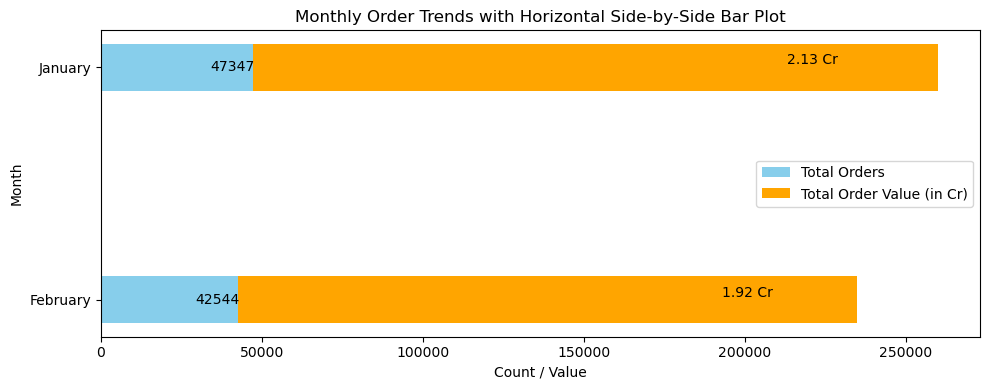

In [ ]:
# Plotting using horizontal side-by-side bar plot
fig, ax = plt.subplots(figsize=(10, 4))

# Set the position for the bars (side by side)
bar_width = 0.2
index = monthly_data['Month'].astype(str)

# Plot Total Orders (1st bar) and Total Order Value (2nd bar) side by side horizontally
bars1 = ax.barh(index, monthly_data['total_orders'], bar_width, label='Total Orders', color='skyblue')
bars2 = ax.barh(index, monthly_data['total_order_value_lakh'], bar_width, label='Total Order Value (in Cr)', color='orange', left=monthly_data['total_orders'])

# Adding annotations for each bar segment
for rect in bars1:
    width = rect.get_width()
    ax.text(width + 500, rect.get_y() + rect.get_height() / 2, 
            str(int(width)), ha='right', va='center', color='black', fontsize=10)

for rect in bars2:
    width = rect.get_width()
    ax.text(width + 500, rect.get_y() + rect.get_height() / 2, 
            f'{width/100000:.2f} Cr', ha='left', va='bottom', color='black', fontsize=10)

# Adding titles and labels
ax.set_xlabel('Count / Value')
ax.set_ylabel('Month')
ax.set_title('Monthly Order Trends with Horizontal Side-by-Side Bar Plot')
ax.legend()

plt.tight_layout()  # To ensure everything fits nicely
plt.show()

**Question :** How do customers of different age groups and genders behave in terms of order frequency and the amount spent?

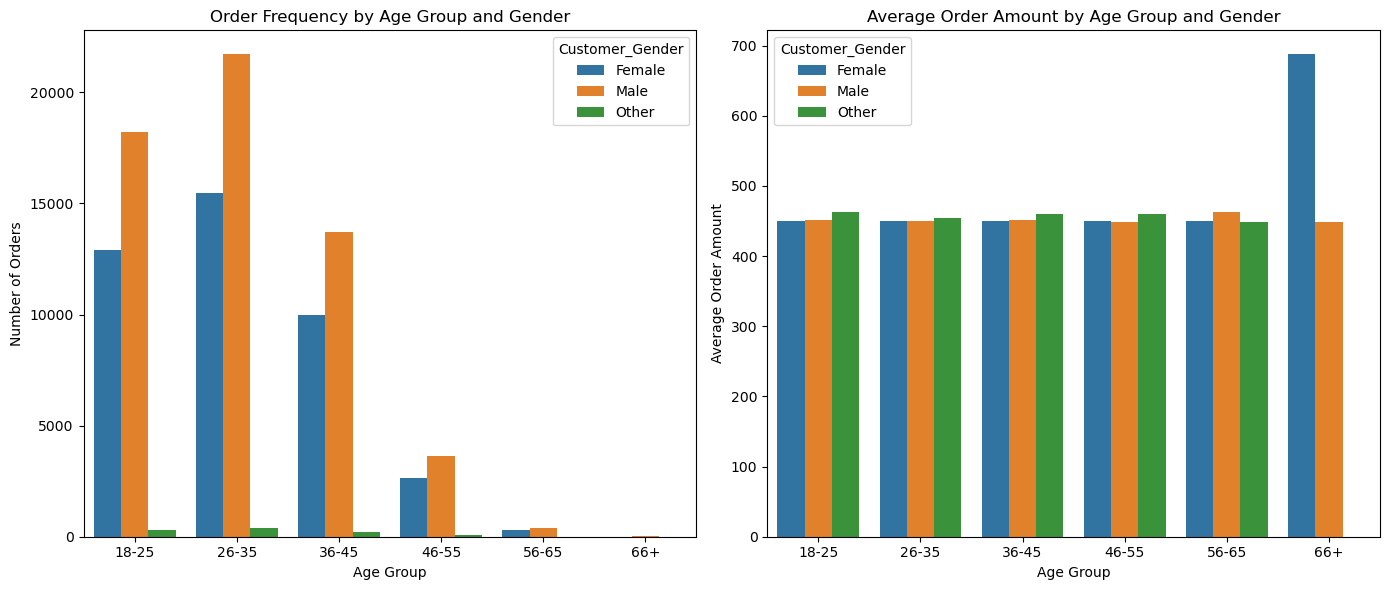

In [27]:
# Grouping by Age and Gender
age_bins = [18, 25, 35, 45, 55, 65, 100]  # Define age groups
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age_Group and Gender to calculate Order Frequency and Average Order Amount
age_gender_group = df.groupby(['Age_Group', 'Customer_Gender']).agg(
    order_frequency=('Order_Amount', 'count'),  # Number of orders per group
    avg_order_amount=('Order_Amount', 'mean')  # Average order value per group
).reset_index()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Order Frequency by Age Group and Gender
sns.barplot(x='Age_Group', y='order_frequency', hue='Customer_Gender', data=age_gender_group, ax=ax[0])
ax[0].set_title('Order Frequency by Age Group and Gender')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Number of Orders')

# Plot Average Order Amount by Age Group and Gender
sns.barplot(x='Age_Group', y='avg_order_amount', hue='Customer_Gender', data=age_gender_group, ax=ax[1])
ax[1].set_title('Average Order Amount by Age Group and Gender')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Average Order Amount')

plt.tight_layout()
plt.show()

**Question:** Which restaurants receive the highest volume of orders, and which one has the highest average order value?

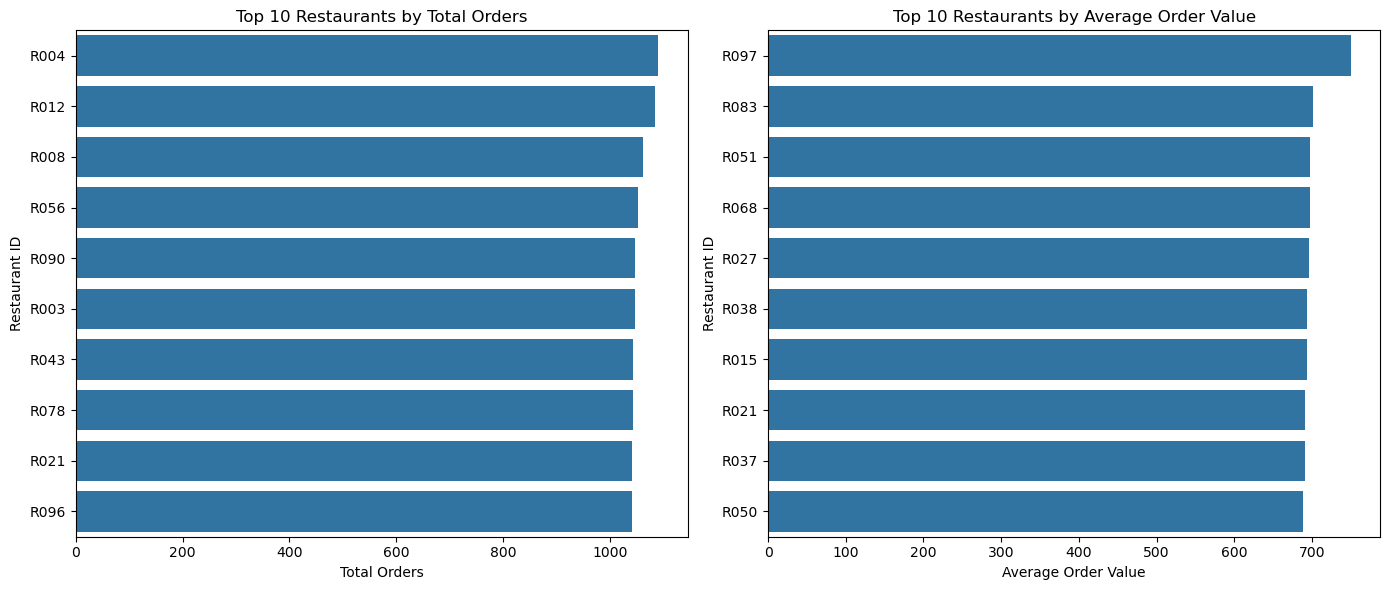

In [28]:
restaurant_performance = df.groupby('Restaurant_ID').agg(
    total_orders=('Order_ID', 'count'),
    avg_order_value=('Order_Amount', 'mean'),
    total_revenue=('Order_Amount', 'sum')
).reset_index()

# Sorting the restaurants by total orders and average order value
top_restaurants_by_orders = restaurant_performance.sort_values(by='total_orders', ascending=False).head(10)
top_restaurants_by_avg_order_value = restaurant_performance.sort_values(by='avg_order_value', ascending=False).head(10)

# Plotting the performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting total orders
sns.barplot(x='total_orders', y='Restaurant_ID', data=top_restaurants_by_orders, ax=ax[0])
ax[0].set_title('Top 10 Restaurants by Total Orders')
ax[0].set_xlabel('Total Orders')
ax[0].set_ylabel('Restaurant ID')

# Plotting average order value
sns.barplot(x='avg_order_value', y='Restaurant_ID', data=top_restaurants_by_avg_order_value, ax=ax[1])
ax[1].set_title('Top 10 Restaurants by Average Order Value')
ax[1].set_xlabel('Average Order Value')
ax[1].set_ylabel('Restaurant ID')

plt.tight_layout()
plt.show()

**Question:** Which cuisine types are ordered the most, and which generate the highest total revenue?

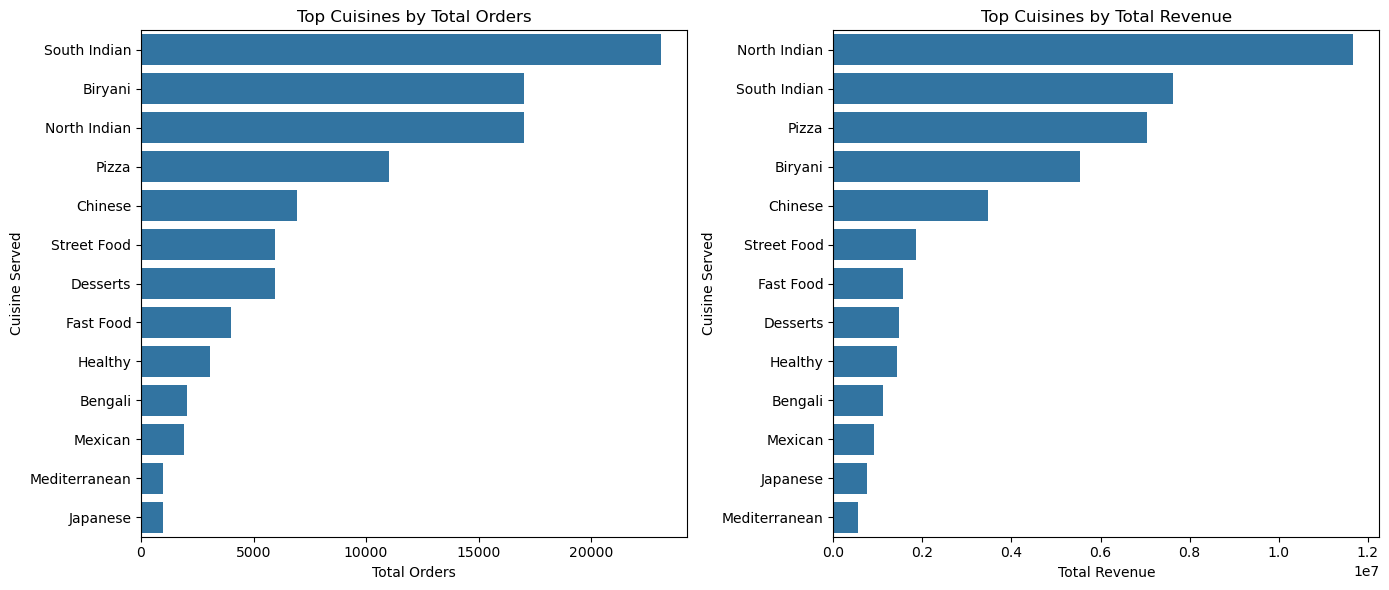

In [29]:
cuisine_performance = df.groupby('Cuisine_Served').agg(
    total_orders=('Order_ID', 'count'),
    total_revenue=('Order_Amount', 'sum'),
    avg_order_value=('Order_Amount', 'mean')
).reset_index()

# Sorting the cuisines by total orders and total revenue
top_cuisines_by_orders = cuisine_performance.sort_values(by='total_orders', ascending=False)
top_cuisines_by_revenue = cuisine_performance.sort_values(by='total_revenue', ascending=False)

# Plotting the performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting total orders
sns.barplot(x='total_orders', y='Cuisine_Served', data=top_cuisines_by_orders, ax=ax[0])
ax[0].set_title('Top Cuisines by Total Orders')
ax[0].set_xlabel('Total Orders')
ax[0].set_ylabel('Cuisine Served')

# Plotting total revenue
sns.barplot(x='total_revenue', y='Cuisine_Served', data=top_cuisines_by_revenue, ax=ax[1])
ax[1].set_title('Top Cuisines by Total Revenue')
ax[1].set_xlabel('Total Revenue')
ax[1].set_ylabel('Cuisine Served')

plt.tight_layout()
plt.show()

**Question:** Which delivery partner consistently provides the fastest delivery times?

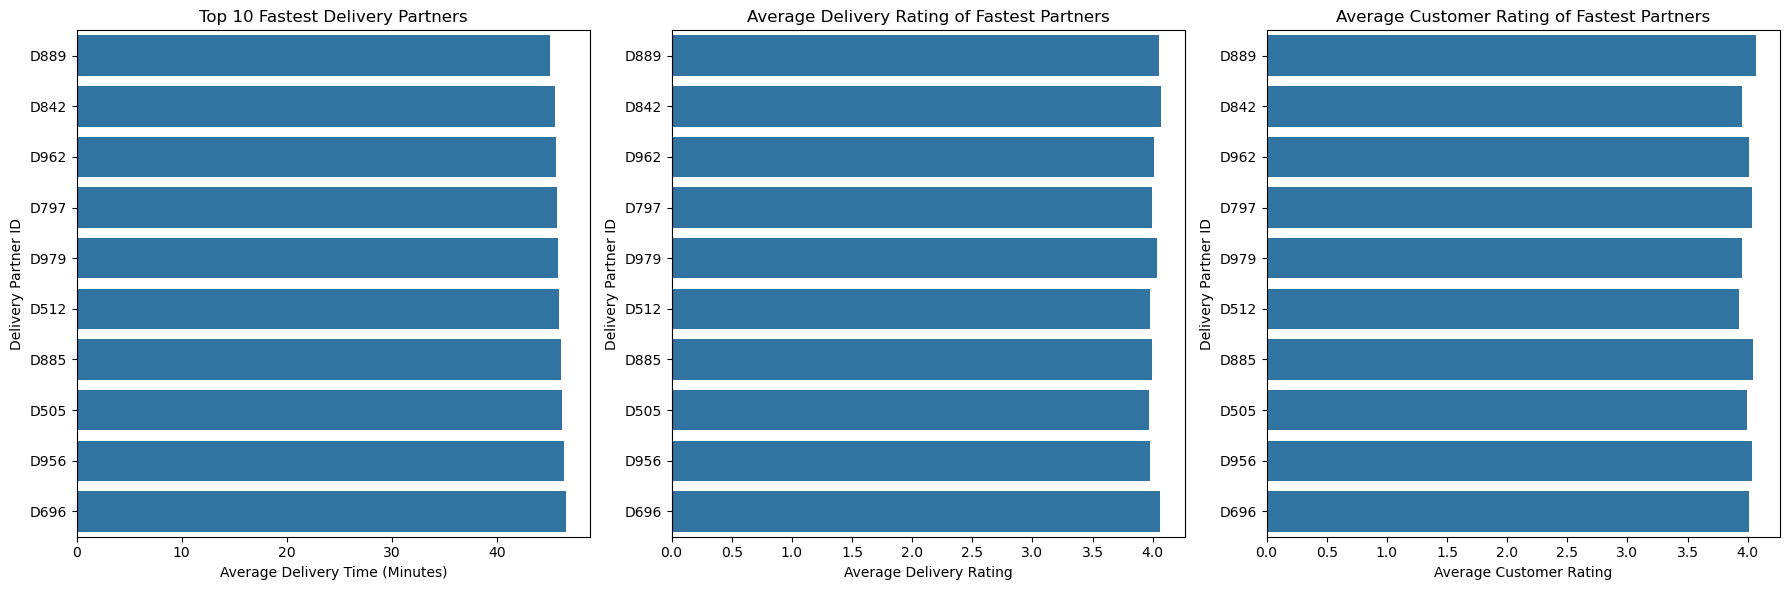

In [30]:
delivery_partner_performance = df.groupby('Delivery_Partner_ID').agg(
    avg_delivery_time=('Delivery_Time_Minutes', 'mean'),
    avg_delivery_rating=('Delivery_Rating', 'mean'),
    avg_customer_rating=('Customer_Rating', 'mean')
).reset_index()

# Sorting the delivery partners by average delivery time
fastest_delivery_partners = delivery_partner_performance.sort_values(by='avg_delivery_time').head(10)

# Plotting the performance metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plotting average delivery time
sns.barplot(x='avg_delivery_time', y='Delivery_Partner_ID', data=fastest_delivery_partners, ax=ax[0])
ax[0].set_title('Top 10 Fastest Delivery Partners')
ax[0].set_xlabel('Average Delivery Time (Minutes)')
ax[0].set_ylabel('Delivery Partner ID')

# Plotting average delivery rating
sns.barplot(x='avg_delivery_rating', y='Delivery_Partner_ID', data=fastest_delivery_partners, ax=ax[1])
ax[1].set_title('Average Delivery Rating of Fastest Partners')
ax[1].set_xlabel('Average Delivery Rating')
ax[1].set_ylabel('Delivery Partner ID')

# Plotting average customer rating
sns.barplot(x='avg_customer_rating', y='Delivery_Partner_ID', data=fastest_delivery_partners, ax=ax[2])
ax[2].set_title('Average Customer Rating of Fastest Partners')
ax[2].set_xlabel('Average Customer Rating')
ax[2].set_ylabel('Delivery Partner ID')

plt.tight_layout()
plt.show()

**Question:** How does the application of a discount affect the final price paid by customers?

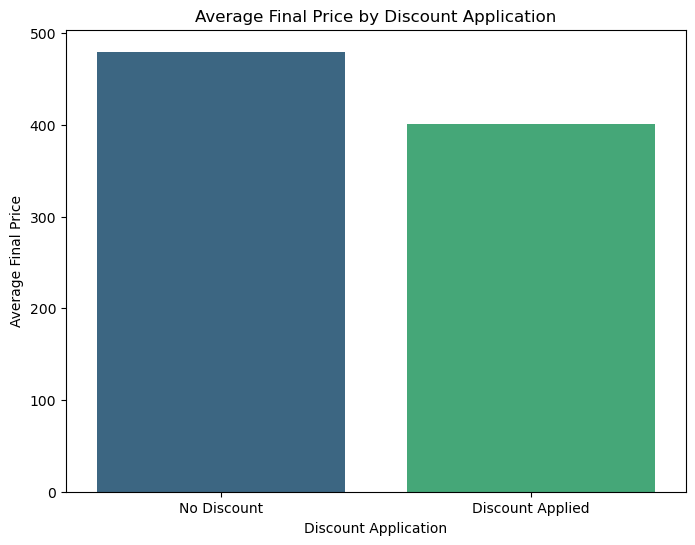

In [31]:
df['Discount_Applied_Flag'] = df['Discount_Applied'] > 0

# Group the data by Discount_Applied_Flag and calculate the average Final_Price
discount_impact = df.groupby('Discount_Applied_Flag').agg(
    avg_final_price=('Final_Price', 'mean')
).reset_index()

# Rename the Discount_Applied_Flag values for better readability
discount_impact['Discount_Applied_Flag'] = discount_impact['Discount_Applied_Flag'].map({True: 'Discount Applied', False: 'No Discount'})

# Plotting the average final price for orders with and without discounts
plt.figure(figsize=(8, 6))
sns.barplot(x='Discount_Applied_Flag', y='avg_final_price', data=discount_impact, palette='viridis')
plt.title('Average Final Price by Discount Application')
plt.xlabel('Discount Application')
plt.ylabel('Average Final Price')
plt.show()

**Question:** Is there a direct correlation between delivery time (in minutes) and the delivery distance (in kilometers)?

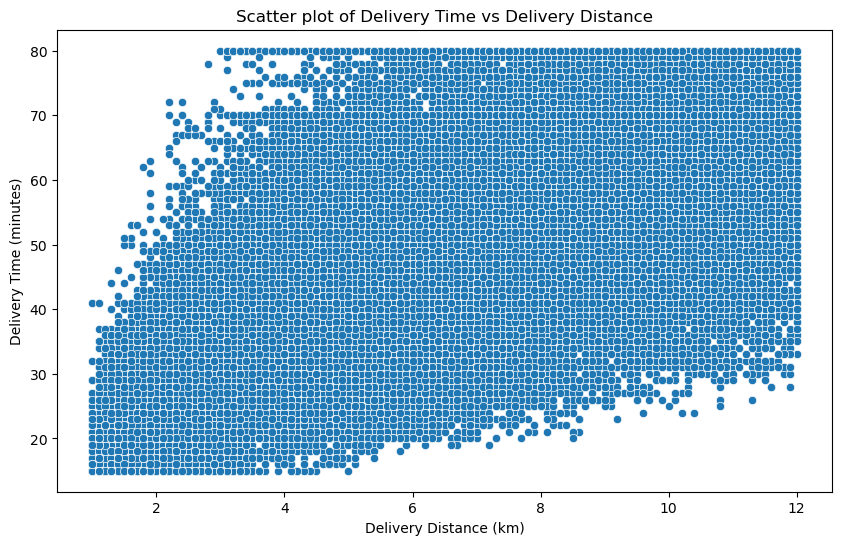

In [32]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_KM', y='Delivery_Time_Minutes', data=df)
plt.title('Scatter plot of Delivery Time vs Delivery Distance')
plt.xlabel('Delivery Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

In [33]:
df[['Delivery_Time_Minutes','Distance_KM']].corr()

,Delivery_Time_Minutes,Distance_KM
Delivery_Time_Minutes,1.000000,0.771836
Distance_KM,0.771836,1.000000


**Question** Do customers who receive discounts tend to rate their experience better or worse than those who don't?

In [34]:

# Create two groups based on Discount_Applied
discounted_orders = df[df['Discount_Applied'] > 0]
non_discounted_orders = df[df['Discount_Applied'] == 0]

# Calculate the average customer ratings for both groups
avg_rating_discounted = discounted_orders['Customer_Rating'].mean()
avg_rating_non_discounted = non_discounted_orders['Customer_Rating'].mean()


In [35]:
print(avg_rating_discounted, avg_rating_non_discounted)

3.997818470075307 4.003378579952267


**Question** What percentage of orders are cancelled each month, and how has this percentage changed over time?

In [36]:
df['Cancelled_Flag'] = df['Delivery_Status'] == 'Cancelled'

# Group by Month and calculate the percentage of cancelled orders
monthly_cancellations = df.groupby('Month').agg(
    total_orders=('Order_ID', 'count'),
    cancelled_orders=('Cancelled_Flag', 'sum')
).reset_index()

monthly_cancellations['cancelled_percentage'] = (monthly_cancellations['cancelled_orders'] / monthly_cancellations['total_orders']) * 100

# Sort by Month for better visualization
month_order = ['January', 'February']
monthly_cancellations['Month'] = pd.Categorical(monthly_cancellations['Month'], categories=month_order, ordered=True)
monthly_cancellations = monthly_cancellations.sort_values('Month')

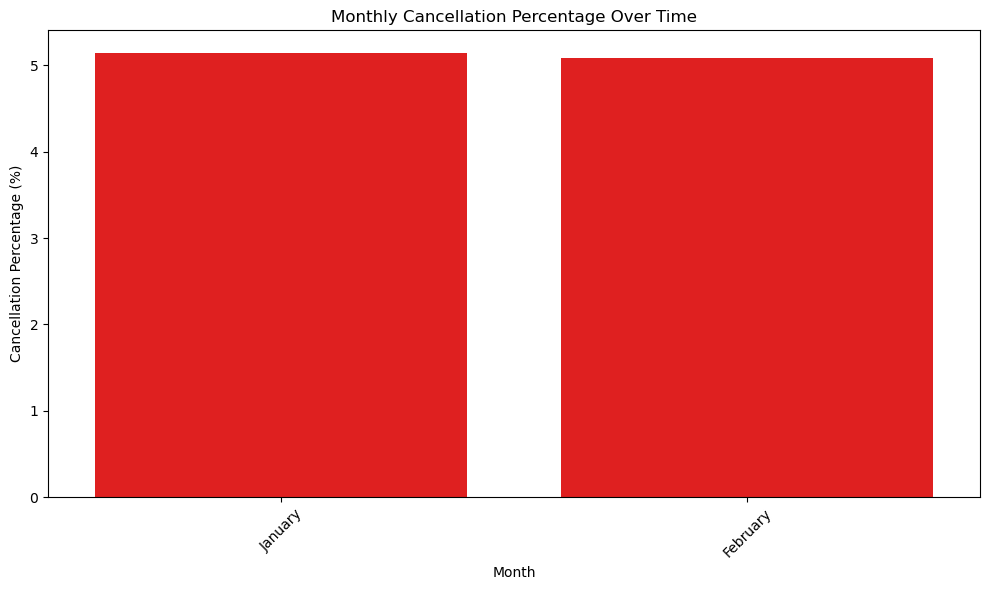

In [37]:
# Plotting the trend
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='cancelled_percentage', data=monthly_cancellations, color='red')
plt.title('Monthly Cancellation Percentage Over Time')
plt.xlabel('Month')
plt.ylabel('Cancellation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question** What is the correlation between order amount and customer rating?

In [38]:
# Correlation between order amount and customer rating
correlation = df["Final_Price"].corr(df["Customer_Rating"])
print(f"Correlation between order amount and customer rating: {correlation:.2f}")

Correlation between order amount and customer rating: 0.00


**Question** What is the probability that an order gets delayed beyond 45 minutes?

In [39]:
# Probability of delay beyond 45 minutes
delay_probability = (df["Delivery_Time_Minutes"] > 45).mean()

print(f"Probability of delay beyond 45 minutes: {delay_probability:.2%}")

Probability of delay beyond 45 minutes: 52.12%
